In [2]:
import sys, platform, os
import pickle
import tqdm
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# Initial setup:
number_of_samples = 100
LCDM_priors = {
               'omegabh2': [0.005, 1.0],
               'omegach2': [0.001, 0.99],
               'H0': [40.0, 100.0],
               'ns': [0.8, 1.2],
               'logAs': [2, 4],
               
               }
redshifts= np.linspace(3, 0, 30)
#definisco il file dove caricherò le sigma a ogni presa dati
cache_file = './LCDM_sigmaLCDM1_8.cache'

Using CAMB 1.3.5 installed at C:\Users\lenovo\anaconda3\lib\site-packages\camb


In [4]:
# if the cache file exists load it and append, otherwise initialize as empty:
#è proprio la definizione di un file specifico a partire da uno generico in camb
if os.path.isfile(cache_file):
    #leggo converto e carico
    #pickle converte le sigma che calcolerò che sono in samples in una lista di bite le carica con load avendole lette con open rb read binary
    sigma_8_samples = list(pickle.load(open(cache_file, 'rb')))
else:
    sigma_8_samples = []

# start the loop:
for i in tqdm.tqdm(range(number_of_samples)):
    # generate the sample:
    #mi dice cosa ci sta nel numero di samples, ovvero un loop che a ogni giro prende gli elementi delle prior
    #questi elementi devono essere generati casualmente uno per uno, da cui 1 come size. i primi due termini in parentesi sono richiamano nell'ordine di lista per ciascumo estremo inferiore e superiore
    _omegabh2 = np.random.uniform(LCDM_priors['omegabh2'][0], LCDM_priors['omegabh2'][1], 1)[0]
    _omegach2 = np.random.uniform(LCDM_priors['omegach2'][0], LCDM_priors['omegach2'][1], 1)[0]
    _H0 = np.random.uniform(LCDM_priors['H0'][0], LCDM_priors['H0'][1], 1)[0]
    _ns = np.random.uniform(LCDM_priors['ns'][0], LCDM_priors['ns'][1], 1)[0]
    _logAs = np.random.uniform(LCDM_priors['logAs'][0], LCDM_priors['logAs'][1], 1)[0]
    
    # process parameters to feed to CAMB:
    _As = 10**(-10)*np.exp(_logAs)
    # set up camb:
    try:
       pars = camb.set_params(H0=_H0, ombh2=_omegabh2, omch2=_omegach2, As=_As, ns=_ns)
       pars.set_matter_power(redshifts, kmax=2.0)
       pars.NonLinear = model.NonLinear_none
       # call camb and compute cosmology:
       results = camb.get_results(pars)
    except:
        print("")
    
    # get sigma8:
    sigma8_z = np.array(results.get_sigma8())
    # append to samples:
    sigma_8_samples.append(results.get_sigma8().copy())
    
# convert to numpy array:
sigma_8_samples = np.array(sigma_8_samples)

# save out to file:
#oltre al caricare devo salvare i dati wb write binary il file è già scritto in binario così phyton non altera i dati
pickle.dump(sigma_8_samples, open(cache_file, 'wb'))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:13<00:00,  1.34s/it]


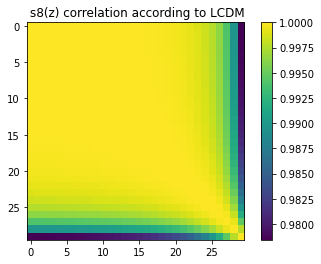

2


In [5]:
# plot correlation matrix:
plt.title(' s8(z) correlation according to LCDM')

#fissarescalacolori
sigma8_corr = np.corrcoef(sigma_8_samples.T)
plt.imshow(sigma8_corr)
plt.colorbar()
plt.show()
print(np.ndim(sigma8_corr))

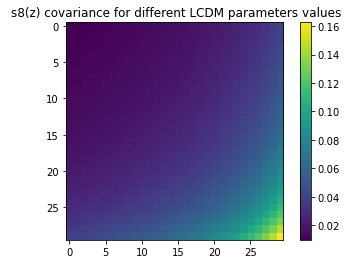

2


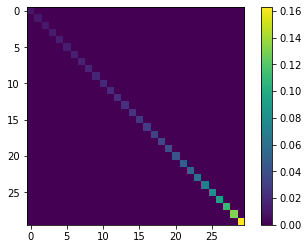

1
2


In [6]:
# plot covariance matrix:
plt.title(' s8(z) covariance for different LCDM parameters values')

#fissarescalacolori
sigma8_cov = np.cov(sigma_8_samples.T)
plt.imshow(sigma8_cov)
plt.colorbar()
plt.show()
print(np.ndim(sigma8_cov))

np.diag(np.diag(sigma8_cov))
plt.imshow(np.diag(np.diag(sigma8_cov)))
plt.colorbar()
plt.show()
print(np.ndim(np.diag(sigma8_cov)))
print(np.ndim(np.diag(np.diag(sigma8_cov))))



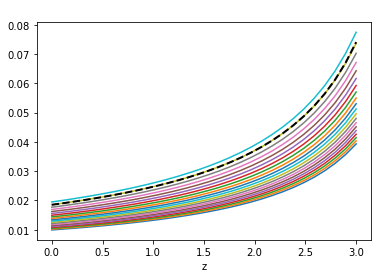

In [7]:
# plot some samples:
#diagonaleinfunzionedellez
sigma8_cov = np.cov(sigma_8_samples.T)
a=sigma8_cov 
#diag=np.diag(a)
mean = np.mean(a, axis=0)
#perchè 20 samples e non10/ così funziona per almeno due avvii(prob perchè ho 20 redshift)
samples_to_plot = 20
plt.plot(redshifts[::-1], mean, color='k', ls='--', lw=2., zorder=999)
for i in range(samples_to_plot):
    _ind = int(i * np.floor(a.shape[0]/samples_to_plot))
    plt.plot(redshifts[::-1], a[_ind, :])
    plt.title(' ')
plt.xlabel('z');
plt.ylabel('');



[0.00993244 0.01046591 0.01104354 0.01167032 0.01235199 0.01309516
 0.01390742 0.01479763 0.01577608 0.01685481 0.018048   0.01937244
 0.02084807 0.02249882 0.02435351 0.02644718 0.02882273 0.03153318
 0.03464467 0.03824064 0.04242762 0.04734351 0.05316973 0.06014948
 0.06861628 0.07904091 0.09211354 0.10890177 0.13120264 0.1625734 ]
1


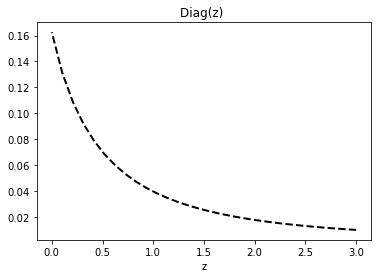

In [8]:
#d=np.diag(cv)
#print(d.ndim)
sigma8_cov = np.cov(sigma_8_samples.T)
#cv=sigma8_cov 
cv=np.diag(sigma8_cov)
print(cv)
print(np.ndim(cv))
#diag=np.diag(a)
#mean = np.mean(d, axis=0)
#perchè 20 samples e non10/ così funziona per almeno due avvii(prob perchè ho 20 redshift)
#samples_to_plot = 20
plt.plot(redshifts[::], cv, color='k', ls='--', lw=2., zorder=999)

plt.title('Diag(z) ')
plt.xlabel('z');
plt.ylabel('');


In [9]:
#corr.th.
n=30
z= np.linspace(3, 0, 30)
a=1/(1+z)
#print(a)
#print(z)

sigma8_th=np.zeros((n,n), dtype=np.float64, order='C')
for i in range(n):
    for j in range(n):
        sigma8_th[i][j]=np.float64((1/(1+(abs(a[i]-a[j])/1)**2)))
print(np.ndim(sigma8_th))        



2


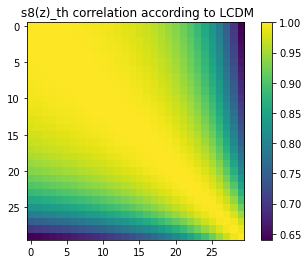

In [10]:
sigma8_th
# plot correlation matrix:
plt.title(' s8(z)_th correlation according to LCDM')


plt.imshow(sigma8_th)
plt.colorbar()
plt.show()

In [11]:
x=30
z = np.linspace(3, 0, x)
a=1/(1+z)


def sigma8_corr_th(time,csi,n):
    m=len(time)
    sigma8th=np.zeros((m,m), dtype=np.float64, order='C')
   
    for i in range(m):
        for j in range(m):
            
            sigma8th[i][j]=1/(1+(abs(time[i]-time[j])/csi)**n)
            
          
    return sigma8th
sigma8th=sigma8_corr_th(a,csi=0.5,n=2)

#print(z)    
#print(csi)
#print(n)
print(np.ndim((sigma8_corr_th(a,csi=0.5,n=2))))
#print((sigma8_corr_th(a,csi=0.5,n=2)))

2


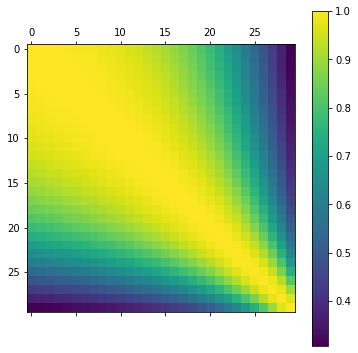

In [12]:
f=plt.figure(figsize=(6,6))
plt.matshow(sigma8th,fignum=f.number)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.show()

In [13]:
print(np.log(a))

[-1.38629436 -1.36009199 -1.33318454 -1.305533   -1.27709507 -1.24782469
 -1.21767165 -1.18658106 -1.15449275 -1.12134054 -1.08705147 -1.05154478
 -1.0147308  -0.97650959 -0.93676926 -0.89538405 -0.85221188 -0.80709144
 -0.75983856 -0.71024161 -0.65805586 -0.60299608 -0.54472718 -0.48285177
 -0.4168938  -0.34627624 -0.27029033 -0.18805223 -0.09844007  0.        ]


0


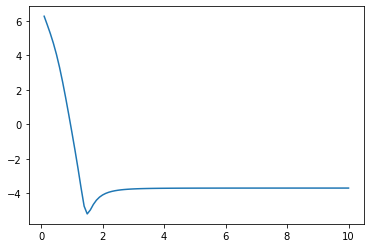

2


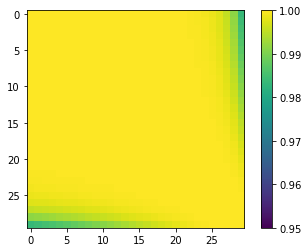

2


TypeError: Invalid shape () for image data

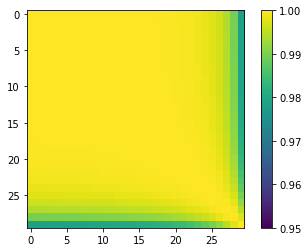

In [14]:
sigma8_corr_exp= np.corrcoef(sigma_8_samples.T)
n_used=5

def sigma8_delta_corr(time,csi,n):
    corr_th=sigma8_corr_th(time,csi,n)
    results=(corr_th-sigma8_corr_exp)**2
    results=np.sum(results)
    return results

print(np.ndim(sigma8_delta_corr(a,x,n)))
temp= [sigma8_delta_corr(a,x,n=n_used) for x in np.linspace(0.1, 10, 100)]   
temp=np.log(temp)


plt.plot(np.linspace(0.1, 10, 100), temp)
plt.show()
plt.imshow(sigma8_corr_th(a,csi=1.7,n=n_used), vmin=0.95, vmax=1.0)
cb=plt.colorbar()
print(np.ndim(sigma8_corr_th(a,csi=1.7,n=n_used)))
plt.show()
plt.imshow(sigma8_corr_exp, vmin=0.95, vmax=1.0)
cb=plt.colorbar()
print(np.ndim(sigma8_corr_exp))
plt.imshow(sigma8_delta_corr(a,csi=1.7,n=n_used), vmin=0.95, vmax=1.0)
cb=plt.colorbar()
print(np.ndim(sigma8_corr_th(a,csi=1.7,n=n_used)))
plt.show()

In [ ]:
sigma8_corr_exp= np.corrcoef(sigma_8_samples.T)

from scipy.optimize import minimize 
x=30
z = np.linspace(3, 0, x)
a=1/(1+z)


def sigma8_corr_th(csi,time,n):
    m=len(time)
    sigma8th=np.zeros((m,m), dtype=np.float64, order='C')
   
    for i in range(m):
        for j in range(m):
            
            sigma8th[i][j]=1/(1+(abs(time[i]-time[j])/csi)**n)
            
          
    return sigma8th



n_used=3
n=n_used

def sigma8_delta_corr(csi,time,n):
    
    
    results=(sigma8_corr_th(csi,time,n)-sigma8_corr_exp)**2
    results=np.sum(results)
    return results
#initialconditions

parametri_casuali = [1]
#print(sigma8_delta_covmin(parametri_casuali,a,cv))
args=(a,n)
#Utilizzo funzione minimize di scipy.Optmize
results = minimize(sigma8_delta_corr,parametri_casuali,method='nelder-mead', options={'xatol':1e-8,'disp':False},args=args)

#Se riesce a minimizzare mostro le variabili con cui ottengo la minimizzazione se no il messaggio di errore
if results.success:
    print(f"Minimo : \n csi: {results.x[0]}, n=3, time=a, fit:1/[1+[|a[i]-a[j]|/csi]^n]")
else:
    raise ValueError(results.message)
print('Loss function:')    
print(np.sum((sigma8_corr_th(csi=2.59,time=a,n=n_used)-sigma8_corr_exp)**2))   

plt.title(' s8(z) correlation th for different LCDM parameters values')    
plt.imshow(sigma8_corr_th(csi=2.59,time=a,n=n_used), vmin=0.95, vmax=1.0)
cb=plt.colorbar()
plt.show()    
plt.title(' s8(z) correlation exp for different LCDM parameters values')    
plt.imshow(sigma8_corr_exp, vmin=0.95, vmax=1.0)
cb=plt.colorbar()    
plt.show()    

 


In [ ]:
sigma8_corr_exp= np.corrcoef(sigma_8_samples.T)

from scipy.optimize import minimize 
x=30
z = np.linspace(3, 0, x)
a=1/(1+z)

import math
def sigma8_corr_th(csi,time,n):
    m=len(time)
    sigma8th=np.zeros((m,m), dtype=np.float64, order='C')
   
    for i in range(m):
        for j in range(m):
            
            sigma8th[i][j]=math.exp(-(abs(time[i]-time[j])/csi)**n)
            
          
    return sigma8th



n_used=3
n=n_used

def sigma8_delta_corr(csi,time,n):
    
    
    results=(sigma8_corr_th(csi,time,n)-sigma8_corr_exp)**2
    results=np.sum(results)
    return results

#initialconditions
parametri_casuali = [1]
#print(sigma8_delta_covmin(parametri_casuali,a,cv))
args=(a,n)
#Utilizzo funzione minimize di scipy.Optmize
results = minimize(sigma8_delta_corr,parametri_casuali,method='nelder-mead', options={'xatol':1e-8,'disp':False},args=args)

#Se riesce a minimizzare mostro le variabili con cui ottengo la minimizzazione se no il messaggio di errore
if results.success:
    print(f"Minimo : \n csi: {results.x[0]}, n=3, time=log[a], fit:e^[-[|a[i]-a[j]|/csi]^n]")
else:
    raise ValueError(results.message)
print('Loss function:')    
print(np.sum((sigma8_corr_th(csi=2.59,time=a,n=n_used)-sigma8_corr_exp)**2))    
plt.title(' s8(z) correlation th for different LCDM parameters values')    
plt.imshow(sigma8_corr_th(csi=2.59,time=a,n=n_used), vmin=0.95, vmax=1.0)
cb=plt.colorbar()
plt.show()    
plt.title(' s8(z) correlation exp for different LCDM parameters values')    
plt.imshow(sigma8_corr_exp, vmin=0.95, vmax=1.0)
cb=plt.colorbar()    
plt.show()    



In [15]:
#from scipy.optimize import fmin
#import pylab
x=30
z = np.linspace(3, 0, x)
a=1/(1+z)

import scipy.optimize as op
def  sigma8_cov_th(time,alpha,beta):
        m=len(time)
        sigma8th=np.zeros(m)
        for i in range(m):   
            
            sigma8th[i]=alpha+beta*(time[i]-1) 
           # return alpha+beta*(a[i]-1)   
        return sigma8th
    
sigma8_cov_th(z,alpha=1.5,beta=1.5)
print(np.ndim((sigma8_cov_th(z,alpha=1.5,beta=1.5))))
#print(a)    



#print((sigma8_cov_th(time,alpha=2.5,beta=2.5))) 
#minimum=fmin(sigma8_cov_th(a,alpha=2.5,beta=2.5),0)
#print(np.ndim(sigma8_cov_th(a,alpha=1.5,beta=1.5)))
#print(np.ndim(z))

plt.plot(redshifts[::],sigma8_cov_th(time,alpha=2.5,beta=2.5) , color='k', ls='--', lw=2., zorder=999)
#param,param_covariace=op.curve_fit(sigma8_cov_th,redshifts,sigma8_cov_th,p_0=None)

#pylab.plot()
plt.title('Diag(z)_th ')
plt.xlabel('z');
plt.ylabel('');
plt.show()

plt.show()
plt.plot(redshifts[::], cv, color='k', ls='--', lw=2., zorder=999)

plt.title('Diag(z)exp ')
plt.xlabel('z');
plt.ylabel('');
plt.show()


#plt.title(' s8(z) covariance for different LCDM parameters values')

#fissarescalacolori










#plt.imshow(sigma8_cov_th(time,alpha=2.5,beta=2.5), vmin=0.95, vmax=1.0)
#cb=plt.colorbar()
#plt.show()

1


NameError: name 'time' is not defined

1
1


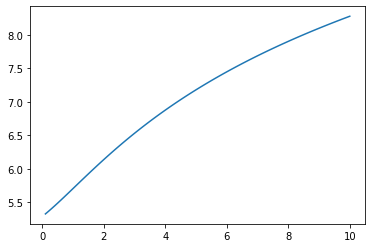

In [16]:

sigma8_cov = np.cov(sigma_8_samples.T)
 
cv=np.diag(sigma8_cov)
def sigma8_delta_cov(time,alpha,beta):
    #cov_th=sigma8_cov_th(a,alpha,beta)
    results=(sigma8_cov_th(time,alpha,beta)-cv)**2
    results=np.sum(results)
    return results
sigma8_cov_th(z,alpha=1.5,beta=1.5)
print(np.ndim((sigma8_cov_th(z,alpha=1.5,beta=1.5))))
print(np.ndim((cv)))
#print(np.ndim(sigma8_delta_cov(a,alpha=1.5,beta=1.5))
#minimizzare funzione 2 variabili semplice 
temp= [sigma8_delta_cov(z,alpha=x,beta=2.5) for x in np.linspace(0.1, 10, 100)] 
plt.plot(np.linspace(0.1, 10, 100), np.log(temp))

Valori minimizzati: 
 alpha: 0.05946510927585426,  beta: -0.036247313611117195, temp:a, fit:alpha+beta*[log[a]-1]
Loss function:
0.012107195201181326


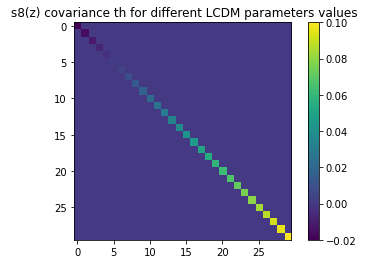

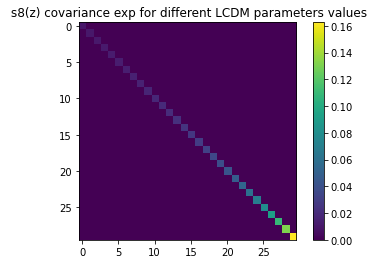

Valori minimizzati: 
 alpha:0.06,  beta:-0.04 , temp:z, fit:alpha+beta*[z-1]
Loss function:
0.012107195201181326


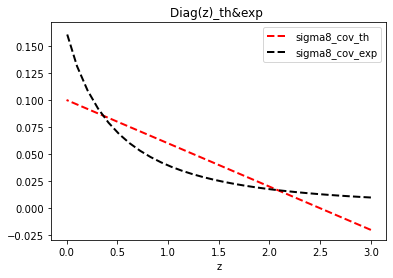

In [29]:
from scipy.optimize import minimize 
x=30
z = np.linspace(3, 0, x)
a=1/(1+z)

import scipy.optimize as op
def  sigma8_cov_th(time,alpha,beta):
        m=len(time)
        sigma8th=np.zeros(m)
        for i in range(m):   
            
            sigma8th[i]=alpha+beta*(time[i]-1) 
           # return alpha+beta*(a[i]-1)   
        return sigma8th
sigma8_cov = np.cov(sigma_8_samples.T)
#usaretemp

cv=np.diag(sigma8_cov)
def sigma8_delta_covmin(parametri,time,cv):
    alpha,beta=parametri
    
    return np.sum((alpha+beta*(time-1)-cv)**2)
#initialconditions
parametri_casuali = [0,0]
time=z
args=(time,cv)
#Utilizzo funzione minimize di scipy.Optmize
results = minimize(sigma8_delta_covmin,parametri_casuali,method='nelder-mead', options={'xatol':1e-8,'disp':False},args=args)

#Se riesce a minimizzare mostro le variabili con cui ottengo la minimizzazione se no il messaggio di errore
if results.success:
    print(f"Valori minimizzati: \n alpha: {results.x[0]},  beta: {results.x[1]}, temp:a, fit:alpha+beta*[log[a]-1]")
else:
    raise ValueError(results.message)
print('Loss function:')    
print(np.sum((sigma8_cov_th(time=z,alpha=0.06,beta=-0.04)-cv)**2)) 
#print(np.ndim(np.diag(sigma8_cov_th(time,alpha=0.1392331973393099,beta=0.18392194895665648))))
plt.title(' s8(z) covariance th for different LCDM parameters values')
plt.imshow(np.diag(sigma8_cov_th(time,alpha=0.06,beta=-0.04)))
plt.colorbar()
plt.show()


#plt.title(' s8(z) covariance th for different LCDM parameters values')
#plt.imshow(sigma8_cov_th(a,alpha=1.39,beta=0.18), vmin=0.95, vmax=1.0)
#cb=plt.colorbar()
#plt.show()
plt.title(' s8(z) covariance exp for different LCDM parameters values')
np.diag(np.diag(sigma8_cov))
plt.imshow(np.diag(np.diag(sigma8_cov)))
plt.colorbar()
plt.show()

print(f"Valori minimizzati: \n alpha:0.06,  beta:-0.04 , temp:z, fit:alpha+beta*[z-1]")
#param,param_covariace=op.curve_fit(sigma8_cov_th,redshifts,sigma8_cov_th,p_0=None)
print('Loss function:')    
print(np.sum((sigma8_cov_th(time=z,alpha=0.06,beta=-0.04)-cv)**2)) 
#pylab.plot()
plt.title('Diag(z)_th&exp ')
plt.xlabel('z');
plt.ylabel('');
plt.plot(redshifts[::],sigma8_cov_th(time,alpha=0.06,beta=-0.04) , color='r',label='sigma8_cov_th', ls='--', lw=2., zorder=999)
plt.plot(redshifts[::], cv, color='k',label='sigma8_cov_exp', ls='--', lw=2., zorder=999)

plt.legend(loc='upper right');
plt.xlabel('z');
plt.ylabel('');
plt.show()

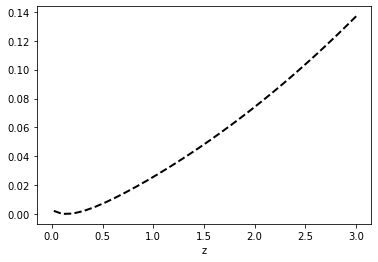

In [18]:

plt.xlabel('z');
plt.ylabel('');
plt.plot(redshifts[::],((sigma8_cov_th(time,alpha=0.20,beta=0.09)-cv)**2) , color='k', ls='--', lw=2., zorder=999)




plt.show()

Valori minimizzati: 
 alpha:0.06,  beta:-0.04 , temp:a, fit:alpha+beta*[a-1]
Loss function:
0.0018226934413616512


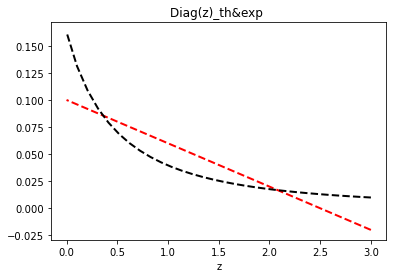

In [19]:
print(f"Valori minimizzati: \n alpha:0.06,  beta:-0.04 , temp:a, fit:alpha+beta*[a-1]")
#param,param_covariace=op.curve_fit(sigma8_cov_th,redshifts,sigma8_cov_th,p_0=None)
print('Loss function:')    
print(np.sum((sigma8_cov_th(time=a,alpha=0.14,beta=0.18)-cv)**2)) 
#pylab.plot()
plt.title('Diag(z)_th&exp ')
plt.xlabel('z');
plt.ylabel('');
plt.plot(redshifts[::],sigma8_cov_th(time,alpha=0.06,beta=-0.04) , color='r', ls='--', lw=2., zorder=999)
plt.plot(redshifts[::], cv, color='k', ls='--', lw=2., zorder=999)


plt.xlabel('z');
plt.ylabel('');
plt.show()



Valori minimizzati: 
 alpha: -0.9406327599959063,  beta: 0.9795073270477275,gamma:1.8115069238433195 temp:log[a], fit:alpha+beta^[gamma[log[a]-1]]
Loss function:
0.0029940980674109416


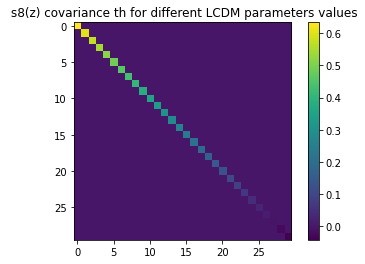

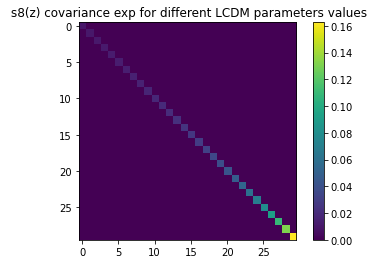

In [30]:
from scipy.optimize import minimize 
sigma8_cov = np.cov(sigma_8_samples.T)

cv=np.diag(sigma8_cov)
x=30
z = np.linspace(3, 0, x)
a=1/(1+z)

import scipy.optimize as op
def  sigma8_cov_th(time,alpha,beta,gamma):
        m=len(time)
        sigma8th=np.zeros(m)
        for i in range(m):   
            
            sigma8th[i]=alpha+beta**(gamma*(time[i]-1))
           # return alpha+beta*(a[i]-1)   
        return sigma8th
    
def sigma8_delta_covmin(parametri,time,cv):
    alpha,beta,gamma=parametri
    
    return np.sum((alpha+beta**(gamma*(time-1))-cv)**2)
#initialconditions
parametri_casuali = [1,1,1]
time=z
args=(time,cv)
#Utilizzo funzione minimize di scipy.Optmize
results = minimize(sigma8_delta_covmin,parametri_casuali,method='nelder-mead', options={'xatol':1e-8,'disp':False},args=args)

#Se riesce a minimizzare mostro le variabili con cui ottengo la minimizzazione se no il messaggio di errore
if results.success:
    print(f"Valori minimizzati: \n alpha: {results.x[0]},  beta: {results.x[1]},gamma:{results.x[2]} temp:log[a], fit:alpha+beta^[gamma[log[a]-1]]")
else:
    raise ValueError(results.message)
print('Loss function:')    
print(np.sum(sigma8_cov_th(time=z,alpha=-0.86,beta=1.44,gamma=0.55)-cv)**2)
#print(np.ndim(np.diag(sigma8_cov_th(time,alpha=0.1392331973393099,beta=0.18392194895665648))))
plt.title(' s8(z) covariance th for different LCDM parameters values')
plt.imshow(np.diag(sigma8_cov_th(time,alpha=-0.86,beta=1.44,gamma=0.55)))
plt.colorbar()
plt.show()


#plt.title(' s8(z) covariance th for different LCDM parameters values')
#plt.imshow(sigma8_cov_th(a,alpha=1.39,beta=0.18), vmin=0.95, vmax=1.0)
#cb=plt.colorbar()
#plt.show()
plt.title(' s8(z) covariance exp for different LCDM parameters values')
np.diag(np.diag(sigma8_cov))
plt.imshow(np.diag(np.diag(sigma8_cov)))
plt.colorbar()
plt.show()


Valori minimizzati: 
 alpha: -0.94,  beta: 0.98,gamma:1.81 temp:z, fit:alpha+beta^[gamma[z-1]]
Loss function:
0.0010258159363456887


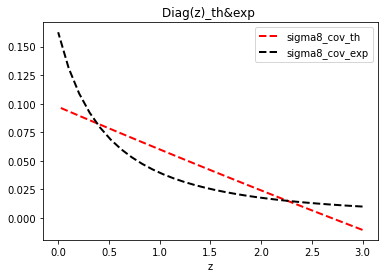

In [31]:
print(f"Valori minimizzati: \n alpha: -0.94,  beta: 0.98,gamma:1.81 temp:z, fit:alpha+beta^[gamma[z-1]]")
#param,param_covariace=op.curve_fit(sigma8_cov_th,redshifts,sigma8_cov_th,p_0=None)
print('Loss function:')    
print(np.sum(sigma8_cov_th(time=z,alpha=-0.94,beta=0.98,gamma=1.81)-cv)**2)
#pylab.plot()
plt.title('Diag(z)_th&exp ')
plt.xlabel('z');
plt.ylabel('');
plt.plot(redshifts[::],sigma8_cov_th(time,alpha=-0.94,beta=0.98,gamma=1.81) , color='r',label='sigma8_cov_th', ls='--', lw=2., zorder=999)
plt.plot(redshifts[::], cv, color='k',label='sigma8_cov_exp', ls='--', lw=2., zorder=999)

plt.legend(loc='upper right');
plt.xlabel('z');
plt.ylabel('');
plt.show()

Valori minimizzati: 
 alpha: 0.0026254050062156373,  beta: 0.19775343678662963,gamma:2.328617644060808 temp:a, fit:alpha+beta*[a-1]^gamma]


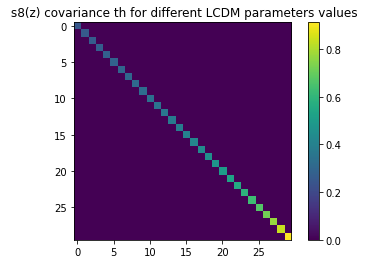

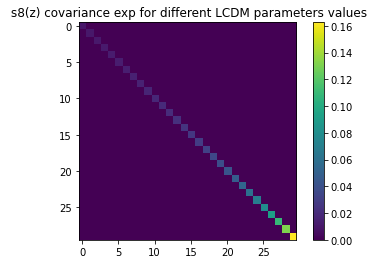

In [37]:
from scipy.optimize import minimize 
sigma8_cov = np.cov(sigma_8_samples.T)

cv=np.diag(sigma8_cov)
x=30
z = np.linspace(3, 0.1, x)
a=1/(1+z)

import scipy.optimize as op
def  sigma8_cov_th(time,alpha,beta,gamma):
        m=len(time)
        sigma8th=np.zeros(m)
        for i in range(m):   
            #time=np.array(-1,dtype=complex)
            sigma8th[i]=alpha+beta*((time[i])**gamma)
           # return alpha+beta*(a[i]-1)   
        return sigma8th
    
def sigma8_delta_covmin(parametri,time,cv):
    alpha,beta,gamma=parametri
    #time=np.array(-1,dtype=complex)
    return np.sum ((alpha+beta*((time)**gamma)-cv)**2)

#initialconditions
parametri_casuali = [1,1,1]
#differentialevolution
time=a
args=(time,cv)
#Utilizzo funzione minimize di scipy.Optmize
#results = minimize(sigma8_delta_covmin,parametri_casuali,method='nelder-mead', options={'xatol':1e-8,'disp':False},args=args)
results = minimize(sigma8_delta_covmin,parametri_casuali,method=None, options=None,args=args)
#Se riesce a minimizzare mostro le variabili con cui ottengo la minimizzazione se no il messaggio di errore
if results.success:
    print(f"Valori minimizzati: \n alpha: {results.x[0]},  beta: {results.x[1]},gamma:{results.x[2]} temp:a, fit:alpha+beta*[a-1]^gamma]")
else:
    raise ValueError(results.message)

plt.title(' s8(z) covariance th for different LCDM parameters values')
plt.imshow(np.diag(sigma8_cov_th(time,alpha=0.0026,beta=1.0,gamma=1.0 )))
plt.colorbar()
plt.show()



plt.title(' s8(z) covariance exp for different LCDM parameters values')
np.diag(np.diag(sigma8_cov))
plt.imshow(np.diag(np.diag(sigma8_cov)))
plt.colorbar()
plt.show()


Valori minimizzati: 
 alpha:0.0026 ,  beta:0.20 ,gamma:2.33 temp:a, fit:alpha+beta*[a]^gamma]
Loss function:
35.761259722039185


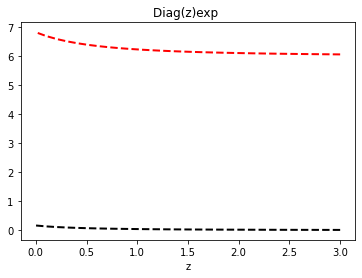

In [38]:
print(f"Valori minimizzati: \n alpha:0.0026 ,  beta:0.20 ,gamma:2.33 temp:a, fit:alpha+beta*[a]^gamma]")
#param,param_covariace=op.curve_fit(sigma8_cov_th,redshifts,sigma8_cov_th,p_0=None)
print('Loss function:')    
print(np.sum(sigma8_cov_th(time=a,alpha=0.1,beta=1,gamma=3)-cv)**2)
#pylab.plot()
plt.title('Diag(z)_th ')
plt.xlabel('z');
plt.ylabel('');
plt.plot(redshifts[::],sigma8_cov_th(time,alpha=6,beta=1,gamma=2) , color='r', ls='--', lw=2., zorder=999)
plt.plot(redshifts[::], cv, color='k', ls='--', lw=2., zorder=999)

plt.title('Diag(z)exp ')
plt.xlabel('z');
plt.ylabel('');
plt.show()

In [ ]:
# plot some samples:

sigma_8_samples
print(sigma_8_samples.ndim)
mean = np.mean(sigma_8_samples, axis=0)
#perchè 20 samples e non10/ così funziona per almeno due avvii(prob perchè ho 20 redshift)
samples_to_plot = 20
plt.plot(redshifts[::-1], mean, color='k', ls='--', lw=2., zorder=999)
for i in range(samples_to_plot):
    _ind = int(i * np.floor(sigma_8_samples.shape[0]/samples_to_plot))
    plt.plot(redshifts[::-1], sigma_8_samples[_ind, :])
    plt.title(' s8(z) according to LCDM')
plt.xlabel('z');
plt.ylabel('Δs8');

In [ ]:
#calcolo sigma per il minimo z
pars = camb.set_params(H0=_H0, ombh2=_omegabh2, omch2=_omegach2, As=_As, ns=_ns )
pars.set_matter_power([0.0], kmax=2.0)
results = camb.get_results(pars)
print(results.get_sigma8())

In [ ]:
#calcolo sigma per il massimo z
pars = camb.set_params(H0=_H0, ombh2=_omegabh2, omch2=_omegach2, As=_As, ns=_ns)
pars.set_matter_power([3.0], kmax=2.0)
results = camb.get_results(pars)

print(results.get_sigma8())
